<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h2>Ingeniero Renzo Bolivar - Docente DAIE</h2> </center> 

<center> <h1>Curso : Computación 2</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

<center> <h1>Numpy Matemático</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

# Descripción:

En este notebook se explicarán los

# Objetivos:

algunas funciones importantes de pandas.

[1. Matemática Básica](#1.-Matemática-Básica)<br>
[2. Matemática Estadística](#2.-Matemática-Estadística)<br>
[3. Procesamiento de señal (scipy.signal)](#3.-Procesamiento-de-señal-(scipy.signal))<br>


[EJEMPLOS](#EJEMPLOS)<br>
[EJERCICIOS](#EJERCICIOS)<br>
[BIBLIOGRAFÍA](#BIBLIOGRAFÍA)<br>

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****EJERCICIOS****<tfont>

### Ejercicio 1 - Investigar Como?

#### Resolver las siguientes ecuaciones:


$$12x + 5y + z= 6$$
$$6x + 10y + z = 8$$
$$3x + 15y + z = 4$$



#### Utilizando un método diferente al enseñado  $A*x =B$

In [10]:
from sympy import symbols, Eq, solve

In [11]:
# Definir las variables
x, y, z = symbols('x y z')

In [12]:
# Definir las ecuaciones
eq1 = Eq(12*x + 5*y + z, 6)
eq2 = Eq(6*x + 10*y + z, 8)
eq3 = Eq(3*x + 15*y + z, 4)

In [13]:
# Paso 2: Eliminar z
lhs_eq4 = eq1.lhs - eq2.lhs
rhs_eq4 = eq1.rhs - eq2.rhs
eq4 = Eq(lhs_eq4, rhs_eq4)

lhs_eq5 = eq2.lhs - eq3.lhs
rhs_eq5 = eq2.rhs - eq3.rhs
eq5 = Eq(lhs_eq5, rhs_eq5)

In [14]:
# Resolver para x y y
sol = solve((eq4, eq5), (x, y))

# Sustituir x y y encontrados en una de las ecuaciones originales para encontrar z
z_value = solve(eq1.subs(sol), z)

In [15]:
# Mostrar resultados
sol[x], sol[y], z_value[0]
print (sol, "z:",z_value)

{x: -2, y: -2} z: [40]


### Ejercicio 2 - Investigar Como?

Integrar **Ecuaciones diferenciales ordinarias** usar la función `odeint` del paquete `integrate`, que permite integrar sistemas del tipo:

$$ \frac{d\mathbf{y}}{dt}=\mathbf{f}\left(\mathbf{y},t\right)$$

con condiciones iniciales $\mathbf{y}(\mathbf{0}) = \mathbf{y_0}$.

In [66]:
# Pista utilizar.......
from scipy.integrate import odeint

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [68]:
def f(y,t): #Definimos la funcion f(y,t)
    return (t**2)*(1+y)

In [69]:
y0=3  #Asignamos una condicion inicial 
t= np.linspace(0, 5, 100)  #Definimos el vector tiempo

In [70]:
sol=integrate.odeint(f,y0,t)  #Integramos la funcion

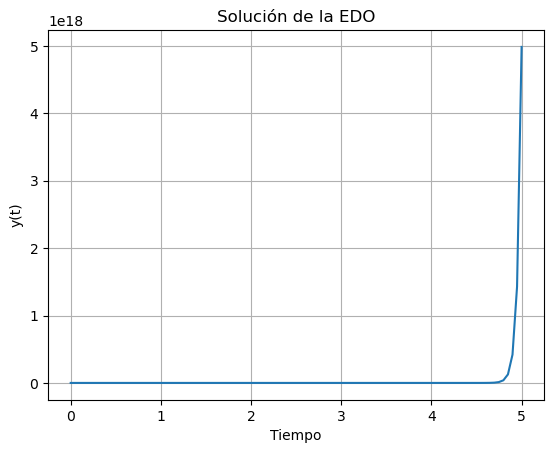

In [71]:
#Grafica de la solucion
plt.plot(t, sol)
plt.xlabel('Tiempo')
plt.ylabel('y(t)')
plt.title('Solución de la EDO')
plt.grid()
plt.show()

### Ejercicio 3 - Investigar Como?

<div class="well">Realizar un ajuste polinomico en numpy del archivo <code>covid.txt</code> (archivo adjunto)
</div>

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Datos proporcionados

In [74]:
data = [
    50, 14, 6, 73, 61, 72, 64, 83, 145, 189, 133, 273, 268, 199, 279, 258, 262, 342, 
    302, 393, 279, 313, 270, 399, 395, 498, 395, 255, 281, 361, 325, 503, 414, 447, 
    327, 388, 294, 433, 485, 463, 521, 442, 451, 521, 489, 1107, 954, 1396, 1197, 
    949, 1342, 1001, 1502, 1360, 1216, 1616, 1166, 1627, 2629, 2628, 2471, 1855, 
    2322, 2247, 3489, 4007, 3933, 4245, 3505, 3678, 4864, 3933, 4297, 4623, 3664, 
    4189, 4799, 5440, 3496, 4911, 4633, 4176, 5215, 6374, 4665, 3882, 5706, 5565, 
    6723, 6478, 6907, 5112, 4982, 36148, 4444, 6259, 5324, 5576, 4577, 3773, 3618, 
    4617, 4265, 4375, 4185, 3986, 3363, 2619, 2467, 3517, 3727, 3654, 2994, 2431, 
    2033, 3102, 3027, 2724, 2981, 2585, 1805, 1681, 2462, 2810, 2276, 2053, 2068, 
    1623, 1688, 2326, 2514, 2257, 2167, 2102, 1846, 1744, 1930, 2100, 1960, 2042, 
    1731, 1438, 1730, 1917, 2123, 2167, 2002, 1957, 1541, 1521, 1835, 2046, 1760, 
    2013, 1525, 1322, 1151, 1781, 1889, 1908, 1926, 1872, 1386, 1349, 1706, 1839, 
    2006, 1934, 1721, 1388, 1563, 1731, 1937, 1934, 2045, 1733, 1236, 1455, 1611, 
    1835, 2100, 2051, 1654, 1519, 1273, 1832, 1646, 1816, 1569, 1163, 1024, 1349, 
    1700, 2203, 2080, 1891, 1739, 1598
]

In [75]:
# Convertimos la lista de datos en un array de NumPy

In [76]:
y = np.array(data)
x = np.arange(len(y))

In [77]:
#Ajuste polinómico de grado 5

grado = 5
coeficientes = np.polyfit(x, y, grado)
polinomio = np.poly1d(coeficientes)

In [78]:
#Generamos puntos para la curva ajustada
xa = np.linspace(0, len(y) - 1, 500)
ya = polinomio(xa)

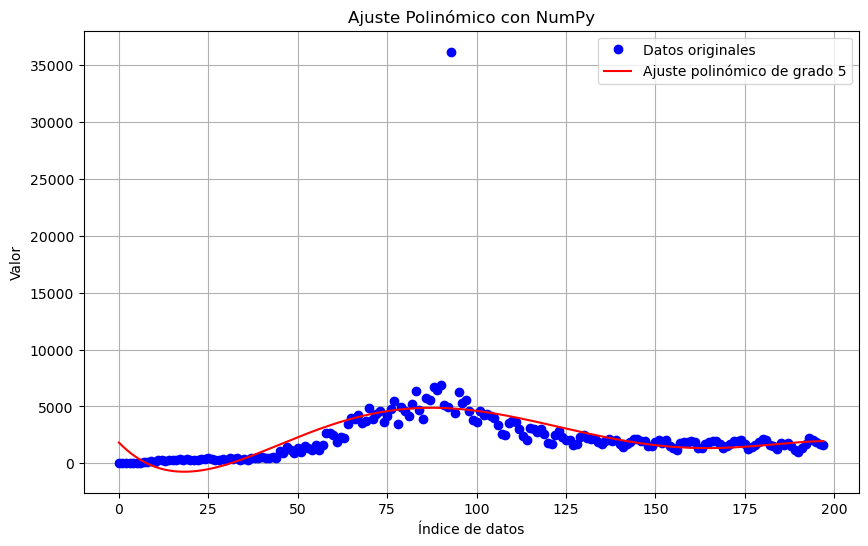

In [79]:
#Graficamos los datos originales y el ajuste polinómico

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='Datos originales')
plt.plot(xa, ya, 'r-', label=f'Ajuste polinómico de grado {grado}')
plt.xlabel('Índice de datos')
plt.ylabel('Valor')
plt.title('Ajuste Polinómico con NumPy')
plt.legend()
plt.grid(True)
plt.show()

### Ejercicio 4 - Investigar Como?

Crear un programa que permita hacer operaciones con matrices en Python utilizando los módulos NumPy y SciPy para resolver la inversa, la multiplicación y la solución de un sistema de ecuaciones lineales. 

In [80]:
import numpy as np

In [81]:
def main():
    print("Operaciones con matrices utilizando NumPy")
    print("1. Inversa de una matriz")
    print("2. Multiplicación de matrices")
    print("3. Solución de un sistema de ecuaciones lineales")
    choice = int(input("Selecciona una opción (1)(2)(3)"))

    if choice == 1:
        matrix = input_matrix()
        if matrix is not None:
            inverse = np.linalg.inv(matrix)
            print("La inversa de la matriz es:")
            print(inverse)
    elif choice == 2:
        matrix1 = input_matrix("Ingrese la primera matriz: ")
        matrix2 = input_matrix("Ingrese la segunda matriz: ")
        if matrix1 is not None and matrix2 is not None:
            product = np.matmul(matrix1, matrix2)
            print("El producto de las matrices es:")
            print(product)
    elif choice == 3:
        coefficients = input_matrix("Ingrese la matriz de coeficientes del sistema de ecuaciones: ")
        constants = input_matrix("Ingrese la matriz de constantes del sistema de ecuaciones: ", vector=True)
        if coefficients is not None and constants is not None:
            solution = np.linalg.solve(coefficients, constants)
            print("La solución del sistema de ecuaciones es:")
            print(solution)
    else:
        print("Opción inválida")

In [82]:
def input_matrix(prompt="Ingrese la matriz: ", vector=False):
    try:
        rows = int(input("Número de filas: "))
        cols = int(input("Número de columnas: "))
        if vector:
            print("Ingrese los elementos separados por espacios:")
            elements = list(map(float, input().split()))
            matrix = np.array(elements).reshape((rows, cols))
        else:
            print("Ingrese los elementos separados por espacios, fila por fila:")
            matrix = []
            for _ in range(rows):
                row = list(map(float, input().split()))
                matrix.append(row)
            matrix = np.array(matrix)
        return matrix
    except ValueError:
        print("Error: Ingrese números válidos")
        return None

In [ ]:
if __name__ == "__main__":
    main()

Operaciones con matrices utilizando NumPy
1. Inversa de una matriz
2. Multiplicación de matrices
3. Solución de un sistema de ecuaciones lineales


### Ejercicio 5 - Investigar Como?

<div class="well">Crear un programa que permita resolver una <strong>interpolación utilizando polinomios de Lagrange</strong> en Python <strong> SciPy </strong> .


</div>

In [ ]:
import numpy as np
from scipy.interpolate import lagrange

In [ ]:
def main():
    print("Interpolación utilizando polinomios de Lagrange")
    n = int(input("Ingrese el número de puntos de datos conocidos: "))

    # Ingresar los puntos de datos conocidos
    x_values = []
    y_values = []
    for i in range(n):
        x = float(input(f"Ingrese el valor de x{i+1}: "))
        y = float(input(f"Ingrese el valor de y{x}: "))
        x_values.append(x)
        y_values.append(y)
        # Crear la función de interpolación de Lagrange
    lagrange_poly = lagrange(x_values, y_values)

    # Imprimir el polinomio de Lagrange
    print("El polinomio de interpolación de Lagrange es:")
    print(lagrange_poly)

    # Pedir el valor de x para el que se desea encontrar la interpolación
    x_interp = float(input("Ingrese el valor de x para encontrar la interpolación: "))

    # Calcular el valor interpolado
    y_interp = lagrange_poly(x_interp)
    print(f"El valor interpolado de y para x={x_interp} es: {y_interp}")

In [ ]:

if __name__ == "__main__":
    main()

### Ejercicio 6 - Investigar Como?

<div class="well"><strong> Graficar las siguientes funciones:</strong> 
    
1. $f(x) = sin(x),  x \epsilon [-2,2]$
2. $f(x) = e^{3x},  x \epsilon [-2,4]$    Sugerencia: usar np.e para valor de 'e'.   
3. $f(x) = \frac{1}{x},  x \epsilon [1,10]$    


</div>

In [ ]:
EJERCICIO 6.1  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definir la función
def f1(x):
    return np.sin(x)

In [ ]:
# Definir el rango de x
x1 = np.linspace(-2, 2, 400)

In [ ]:
# Calcular los valores de y
y1 = f1(x1)

In [ ]:
# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='f(x) = sin(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) = sin(x)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# EJERCICIO 6.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definir la función
def f2(x):
    return np.exp(3 * x)

In [ ]:
# Definir el rango de x
x2 = np.linspace(-2, 4, 400)

In [ ]:
# Calcular los valores de y
y2 = f2(x2)

In [ ]:
# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x2, y2, label='f(x) = e^(3x)', color='orange')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) = e^(3x)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
EJERCICIO 6.3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definir la función
def f3(x):
    return 1 / x

In [ ]:
#Definir el rango de x
x3 = np.linspace(1, 10, 400)

In [ ]:
# Calcular los valores de y
y3 = f3(x3)

In [ ]:
# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x3, y3, label='f(x) = 1/x', color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) = 1/x')
plt.grid(True)
plt.legend()
plt.show()

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****BIBLIOGRAFÍA****<tfont>

[1] Documentación de NumPy: https://numpy.org/doc/stable/

[2] Algebra líneal con NumPy web Pybonacci: https://pybonacci.org/2012/06/07/algebra-lineal-en-python-con-numpy-i-operaciones-basicas/

[3] Funciones de distribución de probabilidad en NumPy: https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html

[4] Algebra líneal en NumPy:https://numpy.org/doc/stable/reference/routines.linalg.html

[5] SymPy:https://www.sympy.org/en/index.html

[6] SciPy:https://www.scipy.org/

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)